In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 

matplotlib.rcParams['figure.figsize'] = [12, 8]

'''
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 'larger'}
matplotlib.rc('font', **font)
''';

In [3]:
#Import real world data

df_30cmDipClip_2chokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4 = pd.read_pickle('30cmDipClip_2chokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4.pkl')

df_30cmDipClip_noChokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4 = pd.read_pickle('30cmDipClip_noChokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4.pkl')

df_30cmDipClip_2chokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4_v2 = pd.read_pickle('30cmDipClip_2chokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4_v2.pkl')

df_30cmDipClip_noChokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4_v2 = pd.read_pickle('30cmDipClip_noChokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4_v2.pkl')

df_30cmDipClip_allChokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4 = pd.read_pickle('30cmDipClip_allChokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4.pkl')

df_30cmDipBananna_noChokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4 = pd.read_pickle('30cmDipBananna_noChokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4.pkl')

df_30cmDipBananna_noChokes_60N60E57V_20dBattAtFeed_rbw10k_DANLn100pm3dB_avg4 = pd.read_pickle('30cmDipBananna_noChokes_60N60E57V_20dBattAtFeed_rbw10k_DANLn100pm3dB_avg4.pkl')

df_30cmDipBananna_5Chokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4 = pd.read_pickle('30cmDipBananna_5Chokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4.pkl')

freqArr = np.array(df_30cmDipClip_2chokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['Frequency (MHz)'])

print(df_30cmDipClip_2chokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4.columns)
print()



Index(['Frequency (MHz)', 'Raw Antenna Power (dBm)', 'Complex Z',
       'Magnitude Z', 'Reflection Coefficent', 'VSWR', 'Matching Loss',
       'Normilized Antenna Power (dBm)'],
      dtype='object')



In [22]:
#import comsol data


#import box data
location = '../comsolOutput/biconAnd30cmDipole_box_60_60_57_0.5MHzRes_1.1.22/'
df_comsol_biconAnd30cmDipole_box_60_60_57 = pd.DataFrame()

df_comsol_biconAnd30cmDipole_box_60_60_57['Frequency (MHz)'], \
    df_comsol_biconAnd30cmDipole_box_60_60_57['Power (dBm)']= np.loadtxt(location + 'powerBicon_dBm.txt', skiprows = 5, unpack = True)



#import full feature data
location = '../comsolOutput/biconAnd30cmDipole_fullFeature_60_60_57_0.5MHzRes_1.1.22/'
df_comsol_biconAnd30cmDipole_fullFeature_60_60_57 = pd.DataFrame()

df_comsol_biconAnd30cmDipole_fullFeature_60_60_57['Frequency (MHz)'], \
    df_comsol_biconAnd30cmDipole_fullFeature_60_60_57['Power (dBm)']= np.loadtxt(location + 'powerBicon_dBm.txt', skiprows = 5, unpack = True)



#import full feature, cable data
location = '../comsolOutput/biconAnd30cmDipole_fullFeature_60_60_57_withCablesV1_0.5MHzRes_1.1.22/'
df_comsol_biconAnd30cmDipole_fullFeature_60_60_57_withCables = pd.DataFrame()

df_comsol_biconAnd30cmDipole_fullFeature_60_60_57_withCables['Frequency (MHz)'], \
    df_comsol_biconAnd30cmDipole_fullFeature_60_60_57_withCables['Power (dBm)']= np.loadtxt(location + 'powerBicon_dBm.txt', skiprows = 5, unpack = True)



# Data

I used the Rigol spectrum analyzer in tracking generator mode to get power from the bicon as I injected with two small dipoles. I used the RigExpert to measure the impedance of the small dipole. 

Power reflected from the dipole after impedance match

$P_r = P_i - P_d$

Where $P_i$ = power incident and $P_d$ = power delivered

Matching loss is the ratio of incident to delivered power. Note a positive ML is a mismatch.

$P_d = \frac{P_i}{ML}$ 

$10 log(P_d) = 10log(P_i) - 10log(ML)$

We can get ML by measuring impedance;

$ML = -10log(1-\Gamma^2)$

where

$\Gamma = \frac{\sqrt{(R - Z_0)^2 + X^2}} {\sqrt{(R + Z_0)^2 + X^2)}}$

I calculated ML and added it to the raw antenna output power from sweeping with the tracking generator

30 cm dipole, 2 chokes, 60N60E57V


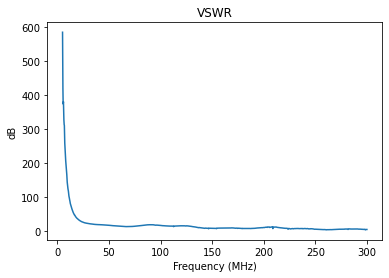

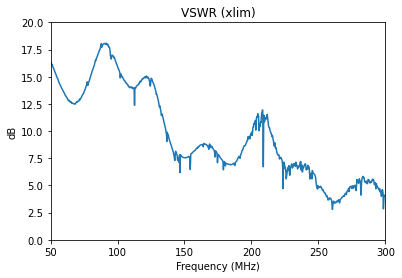

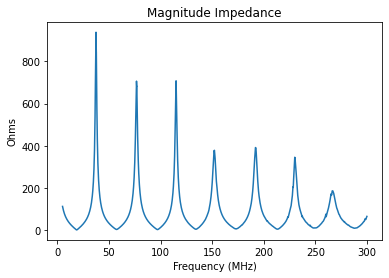

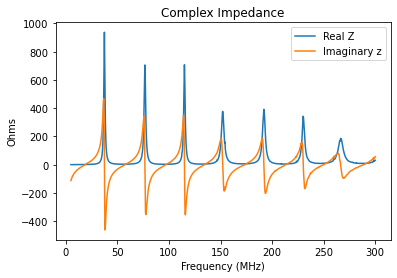

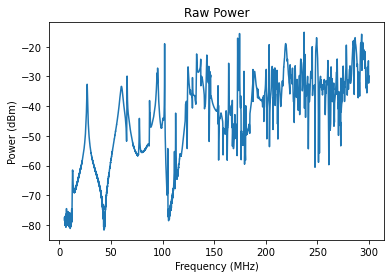

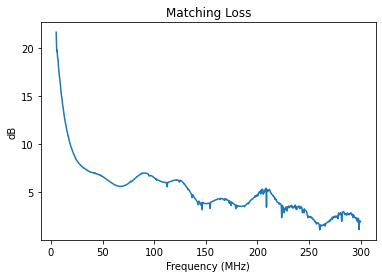

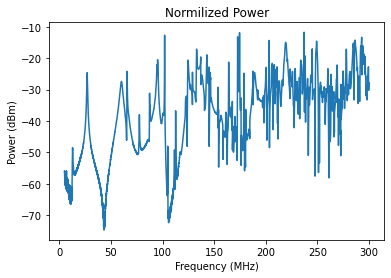

In [15]:
%matplotlib inline


plt.figure()
plt.title('VSWR')
plt.plot(freqArr, df_30cmDipClip_2chokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['VSWR'])
plt.ylabel('dB')
plt.xlabel('Frequency (MHz)')

plt.figure()
plt.title('VSWR (xlim)')
plt.plot(freqArr, df_30cmDipClip_2chokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['VSWR'])
plt.ylabel('dB')
plt.xlabel('Frequency (MHz)')
plt.xlim(50,300)
plt.ylim(0,20)

plt.figure()
plt.title('Magnitude Impedance')
plt.plot(freqArr, df_30cmDipClip_2chokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['Magnitude Z'])
plt.ylabel('Ohms')
plt.xlabel('Frequency (MHz)')


real = [ele.real for ele in df_30cmDipClip_2chokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['Complex Z']]
im = [ele.imag for ele in df_30cmDipClip_2chokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['Complex Z']]

plt.figure()
plt.title('Complex Impedance')
plt.plot(freqArr, real, label = 'Real Z')
plt.plot(freqArr, im, label = 'Imaginary z')
plt.ylabel('Ohms')
plt.xlabel('Frequency (MHz)')
plt.legend()

plt.figure()
plt.title('Raw Power')
plt.plot(freqArr, df_30cmDipClip_2chokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['Raw Antenna Power (dBm)'])
plt.ylabel('Power (dBm)')
plt.xlabel('Frequency (MHz)')

plt.figure()
plt.title('Matching Loss')
plt.plot(freqArr, df_30cmDipClip_2chokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['Matching Loss'])
plt.ylabel('dB')
plt.xlabel('Frequency (MHz)')

plt.figure()
plt.title('Normilized Power')
plt.plot(freqArr, df_30cmDipClip_2chokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['Normilized Antenna Power (dBm)'])
plt.ylabel('Power (dBm)')
plt.xlabel('Frequency (MHz)')

print('30 cm dipole, 2 chokes, 60N60E57V')

Text(0.5, 0, 'Frequency (MHz)')

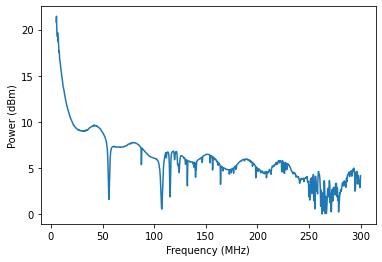

In [5]:
%matplotlib inline
plt.figure()
#plt.title('Raw Power')
plt.plot(freqArr,df_30cmDipBananna_noChokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['Matching Loss'])
plt.ylabel('Power (dBm)')
plt.xlabel('Frequency (MHz)')


# Compare v1 and v2

I took data (tracking generator using Rigol and impedance using RigExpert) using 2 chokes, then no chokes. I wanted to make sure recall wasn't a problem so I retook them both as (sufix v2)


Take away: differences are real and I can reapeat these measurements to within a few dB

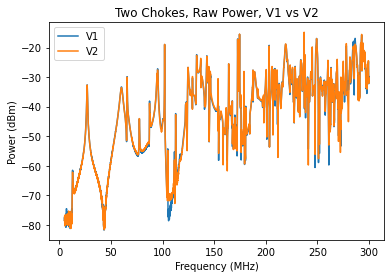

In [22]:
%matplotlib inline
plt.title('Two Chokes, Raw Power, V1 vs V2')
plt.plot(freqArr, df_30cmDipClip_2chokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['Raw Antenna Power (dBm)'],\
         label = 'V1')
plt.plot(freqArr, df_30cmDipClip_2chokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4_v2['Raw Antenna Power (dBm)'],\
         label = 'V2')

plt.ylabel('Power (dBm)')
plt.xlabel('Frequency (MHz)')
plt.legend()

Text(0.5, 0, 'Frequency (MHz)')

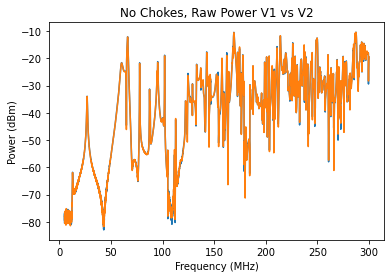

In [8]:
%matplotlib inline

plt.title('No Chokes, Raw Power V1 vs V2')
plt.plot(freqArr, df_30cmDipClip_noChokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['Raw Antenna Power (dBm)'],\
         label = 'V1')
plt.plot(freqArr, df_30cmDipClip_noChokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4_v2['Raw Antenna Power (dBm)'],\
         label = 'V2')

plt.ylabel('Power (dBm)')
plt.xlabel('Frequency (MHz)')



In [9]:
'''Raw_2chokesDiff_v2 = df_30cmDipClip_2chokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4_v2['Raw Antenna Power (dBm)'] \
        - df_30cmDipClip_2chokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['Raw Antenna Power (dBm)']


plt.title('No Chokes, V1 vs V2')
plt.plot(freqArr, df_30cmDipClip_noChokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['Raw Antenna Power (dBm)'],\
         label = 'V1')
plt.plot(freqArr, df_30cmDipClip_noChokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4_v2['Raw Antenna Power (dBm)'],\
         label = 'V2')

plt.ylabel('Power (dBm)')
plt.xlabel('Frequency (MHz)')
'''

"Raw_2chokesDiff_v2 = df_30cmDipClip_2chokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4_v2['Raw Antenna Power (dBm)']         - df_30cmDipClip_2chokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['Raw Antenna Power (dBm)']\n\n\nplt.title('No Chokes, V1 vs V2')\nplt.plot(freqArr, df_30cmDipClip_noChokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['Raw Antenna Power (dBm)'],         label = 'V1')\nplt.plot(freqArr, df_30cmDipClip_noChokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4_v2['Raw Antenna Power (dBm)'],         label = 'V2')\n\nplt.ylabel('Power (dBm)')\nplt.xlabel('Frequency (MHz)')\n"

I don't notice a meaningful difference, my recall is good enough.

# Effect of chokes on power

Chokes seems to pull down some of the "mode" looking structures. See 

(20.0, 75.0)

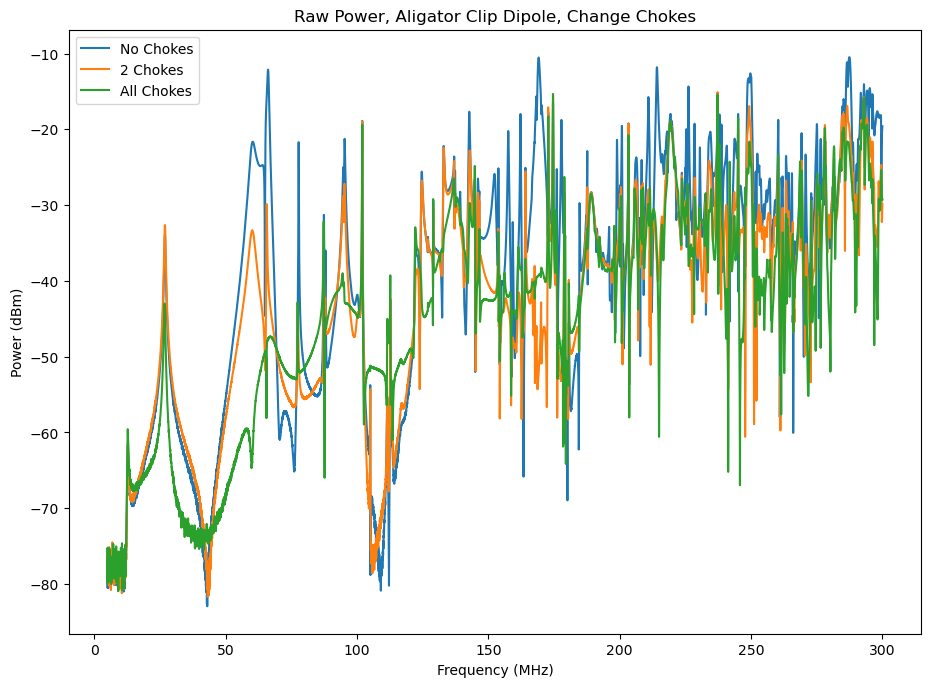

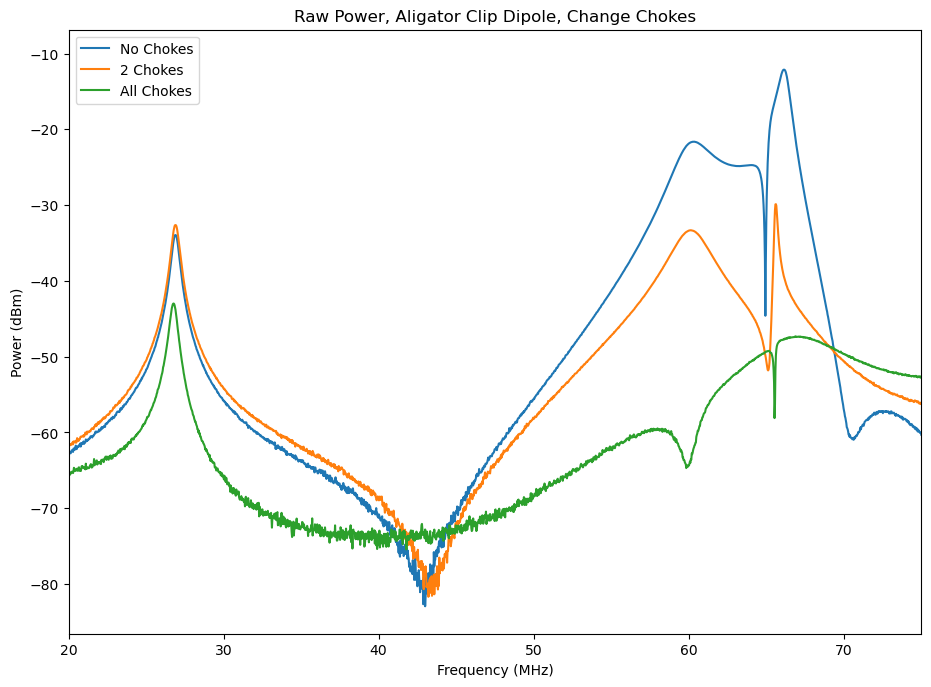

In [32]:
%matplotlib inline
plt.figure(figsize=(11, 8), dpi=100)
plt.title('Raw Power, Alligator Clip Dipole, Change Chokes')
plt.plot(freqArr, df_30cmDipClip_noChokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['Raw Antenna Power (dBm)'],\
         label = 'No Chokes')
plt.plot(freqArr, df_30cmDipClip_2chokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['Raw Antenna Power (dBm)'],\
         label = '2 Chokes')
plt.plot(freqArr, df_30cmDipClip_allChokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['Raw Antenna Power (dBm)'],\
         label = 'All Chokes')

plt.ylabel('Power (dBm)')
plt.xlabel('Frequency (MHz)')
plt.legend()


plt.figure(figsize=(11, 8), dpi=100)
plt.title('Raw Power, Alligator Clip Dipole, Change Chokes')
plt.plot(freqArr, df_30cmDipClip_noChokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['Raw Antenna Power (dBm)'],\
         label = 'No Chokes')
plt.plot(freqArr, df_30cmDipClip_2chokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['Raw Antenna Power (dBm)'],\
         label = '2 Chokes')
plt.plot(freqArr, df_30cmDipClip_allChokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['Raw Antenna Power (dBm)'],\
         label = 'All Chokes')

plt.ylabel('Power (dBm)')
plt.xlabel('Frequency (MHz)')
plt.legend()
plt.xlim(20, 75)



# Alligator Clip vs Banana Plug Dipole (No Chokes)

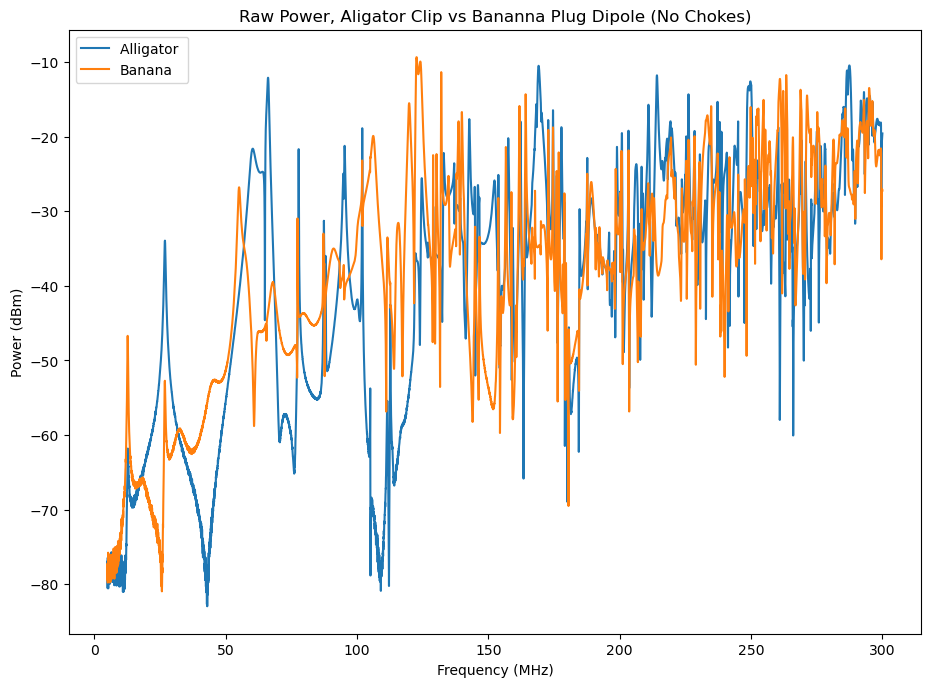

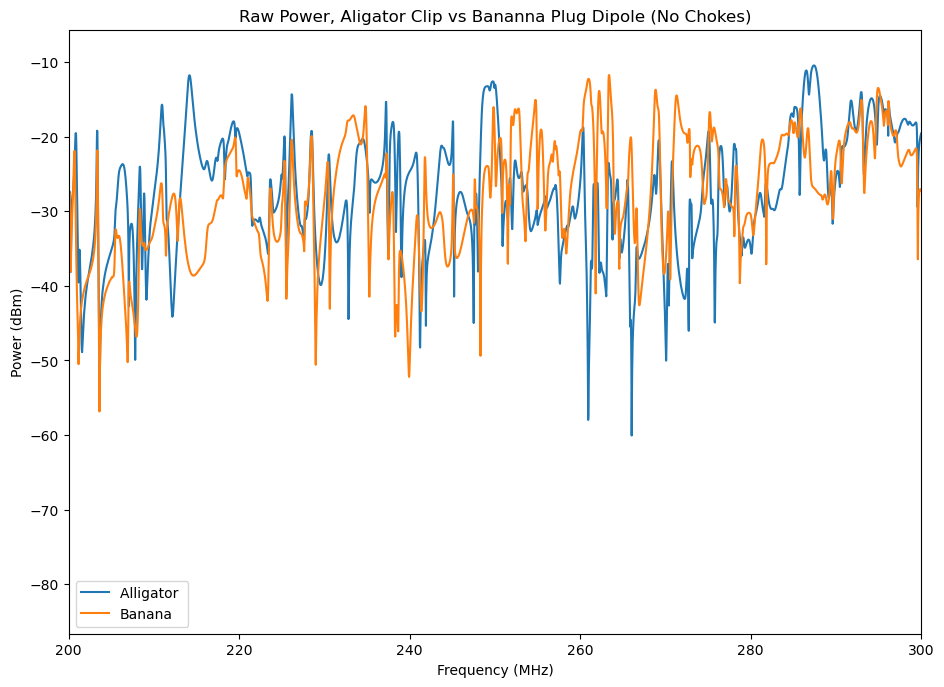

In [41]:
%matplotlib inline
plt.figure(figsize=(11, 8), dpi=100)
plt.title('Raw Power, Aligator Clip vs Bananna Plug Dipole (No Chokes)')
plt.plot(freqArr, df_30cmDipClip_noChokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['Raw Antenna Power (dBm)'],\
         label = 'Alligator ')
plt.plot(freqArr, df_30cmDipBananna_noChokes_60N60E57V_20dBattAtFeed_rbw10k_DANLn100pm3dB_avg4['Raw Antenna Power (dBm)'],\
         label = 'Banana')



plt.ylabel('Power (dBm)')
plt.xlabel('Frequency (MHz)')
plt.legend()


plt.figure(figsize=(11, 8), dpi=100)
plt.title('Raw Power, Aligator Clip vs Bananna Plug Dipole (No Chokes)')

plt.plot(freqArr, df_30cmDipClip_noChokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['Raw Antenna Power (dBm)'],\
         label = 'Alligator ')
plt.plot(freqArr, df_30cmDipBananna_noChokes_60N60E57V_20dBattAtFeed_rbw10k_DANLn100pm3dB_avg4['Raw Antenna Power (dBm)'],\
         label = 'Banana')

plt.ylabel('Power (dBm)')
plt.xlabel('Frequency (MHz)')
plt.xlim(200,300)
plt.legend()

# Compare Comsol and Real Data

Notice that real data is quite dependent on the use of alligator clip vs banana plug antenna.    

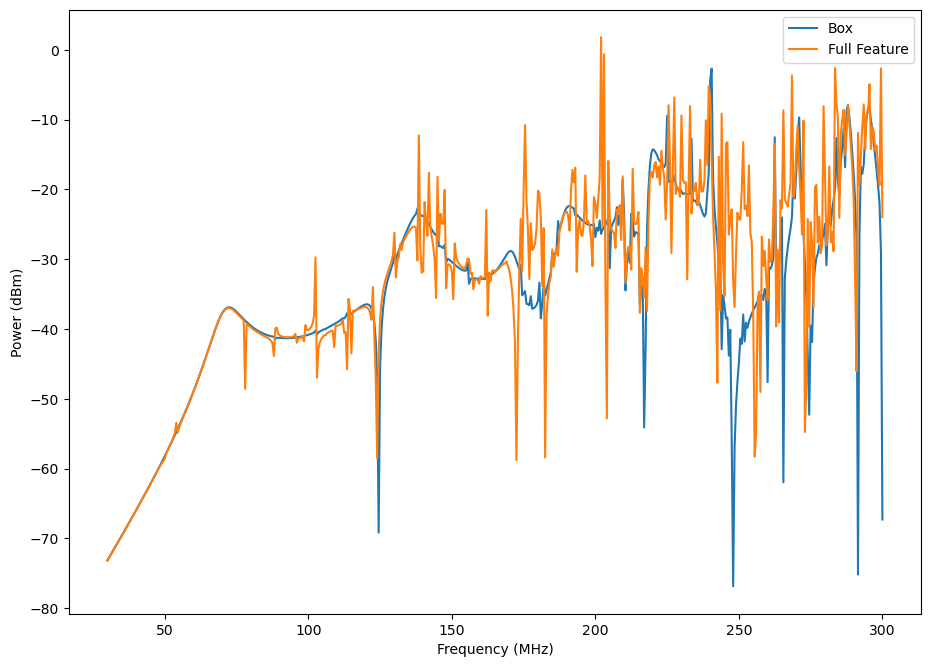

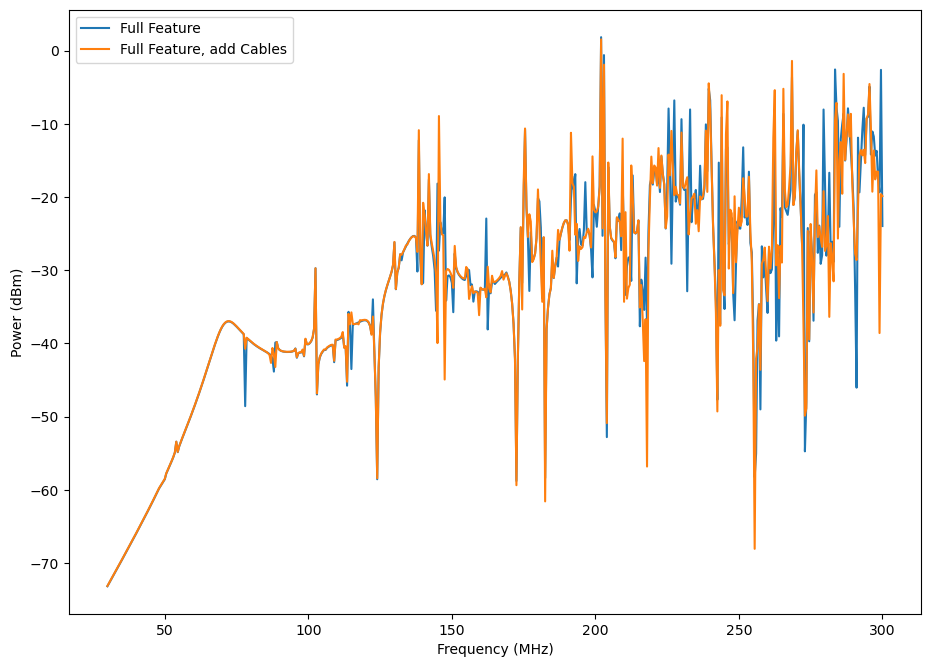

In [25]:
%matplotlib inline

plt.figure(figsize=(11, 8), dpi=100)
plt.plot(df_comsol_biconAnd30cmDipole_box_60_60_57['Frequency (MHz)'], df_comsol_biconAnd30cmDipole_box_60_60_57['Power (dBm)'], label = 'Box')
plt.plot(df_comsol_biconAnd30cmDipole_fullFeature_60_60_57['Frequency (MHz)'], df_comsol_biconAnd30cmDipole_fullFeature_60_60_57['Power (dBm)'], label = 'Full Feature')
plt.legend()
plt.ylabel('Power (dBm)')
plt.xlabel('Frequency (MHz)')
plt.legend()

plt.figure(figsize=(11, 8), dpi=100)
plt.plot(df_comsol_biconAnd30cmDipole_fullFeature_60_60_57['Frequency (MHz)'], df_comsol_biconAnd30cmDipole_fullFeature_60_60_57['Power (dBm)'], label = 'Full Feature')
plt.plot(df_comsol_biconAnd30cmDipole_fullFeature_60_60_57_withCables['Frequency (MHz)'], df_comsol_biconAnd30cmDipole_fullFeature_60_60_57_withCables['Power (dBm)'], label = 'Full Feature, add Cables')
plt.legend()
plt.ylabel('Power (dBm)')
plt.xlabel('Frequency (MHz)')
plt.legend()


In [32]:
%matplotlib qt
plt.figure(figsize=(11, 8), dpi=100)
plt.title('Aligator Clip (All chokes, Normilized) vs COMSOL Full Feature')

plt.plot(freqArr, df_30cmDipClip_allChokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['Raw Antenna Power (dBm)'],\
         label = 'Alligator')

plt.plot(df_comsol_biconAnd30cmDipole_fullFeature_60_60_57_withCables['Frequency (MHz)'], \
         df_comsol_biconAnd30cmDipole_fullFeature_60_60_57_withCables['Power (dBm)'] - 8.57, label = 'COMSOL')
plt.ylabel('Power (dBm)')
plt.xlabel('Frequency (MHz)')
plt.legend()

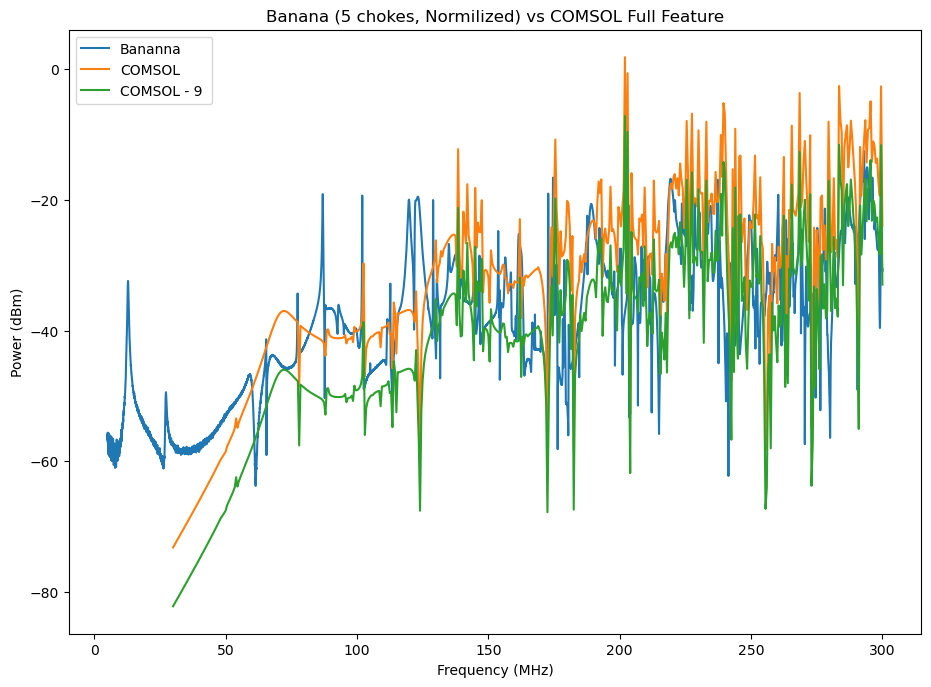

In [34]:
%matplotlib inline
plt.figure(figsize=(11, 8), dpi=100)
plt.title('Banana (5 chokes, Normilized) vs COMSOL Full Feature')

plt.plot(freqArr, df_30cmDipBananna_5Chokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4 ['Normilized Antenna Power (dBm)'],\
         label = 'Bananna')

plt.plot(df_comsol_biconAnd30cmDipole_fullFeature_60_60_57['Frequency (MHz)'], \
         df_comsol_biconAnd30cmDipole_fullFeature_60_60_57['Power (dBm)'] , label = 'COMSOL')

plt.plot(df_comsol_biconAnd30cmDipole_fullFeature_60_60_57['Frequency (MHz)'], \
         df_comsol_biconAnd30cmDipole_fullFeature_60_60_57['Power (dBm)'] -9 , label = 'COMSOL - 9 ')
plt.ylabel('Power (dBm)')
plt.xlabel('Frequency (MHz)')
plt.legend()

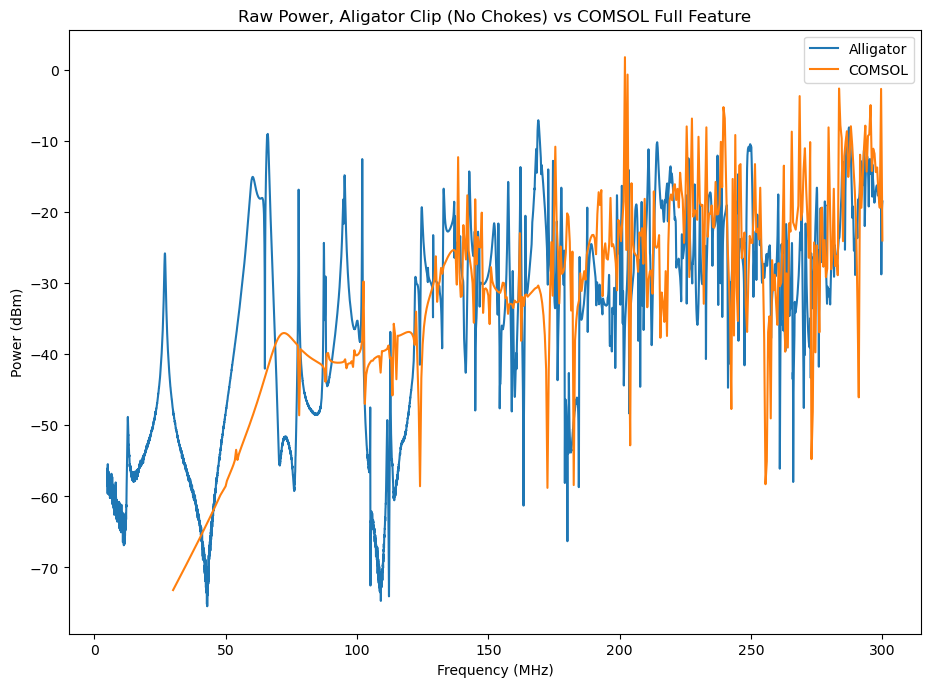

In [35]:
%matplotlib inline
plt.figure(figsize=(11, 8), dpi=100)
plt.title('Raw Power, Aligator Clip (No Chokes) vs COMSOL Full Feature')
plt.plot(freqArr, df_30cmDipClip_noChokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['Normilized Antenna Power (dBm)'],\
         label = 'Alligator')
plt.plot(df_comsol_biconAnd30cmDipole_fullFeature_60_60_57['Frequency (MHz)'], \
         df_comsol_biconAnd30cmDipole_fullFeature_60_60_57['Power (dBm)'], label = 'COMSOL')
plt.ylabel('Power (dBm)')
plt.xlabel('Frequency (MHz)')
plt.legend()

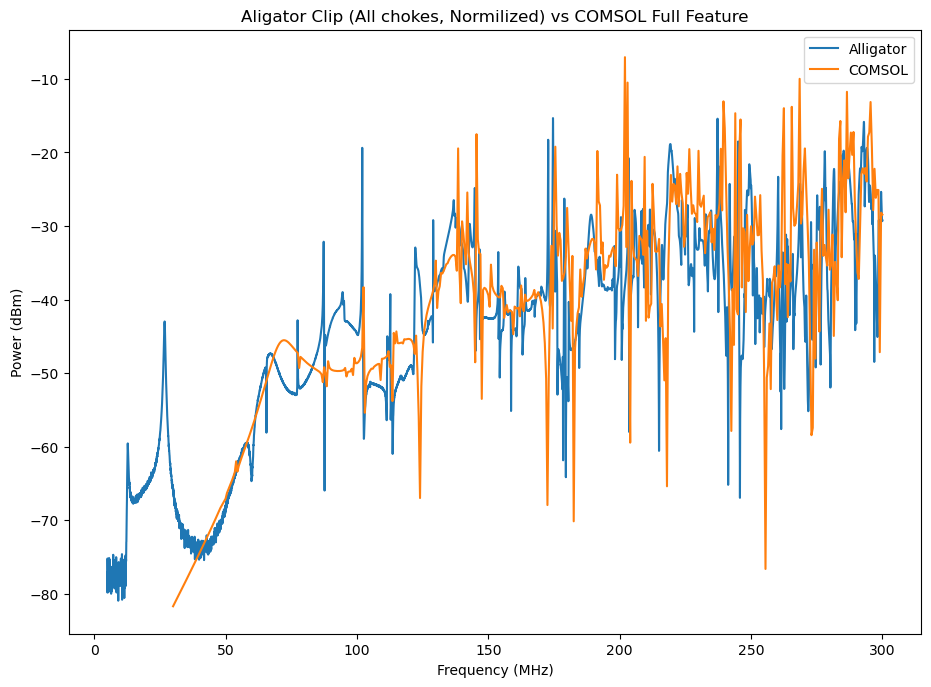

In [42]:
%matplotlib inline
plt.figure(figsize=(11, 8), dpi=100)
plt.title('Aligator Clip (All chokes, Normilized) vs COMSOL Full Feature')

plt.plot(freqArr, df_30cmDipClip_allChokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['Raw Antenna Power (dBm)'],\
         label = 'Alligator')

plt.plot(df_comsol_biconAnd30cmDipole_fullFeature_60_60_57_withCables['Frequency (MHz)'], \
         df_comsol_biconAnd30cmDipole_fullFeature_60_60_57_withCables['Power (dBm)'] - 8.57, label = 'COMSOL')
plt.ylabel('Power (dBm)')
plt.xlabel('Frequency (MHz)')
plt.legend()



NameError: name 'comsolFreq' is not defined

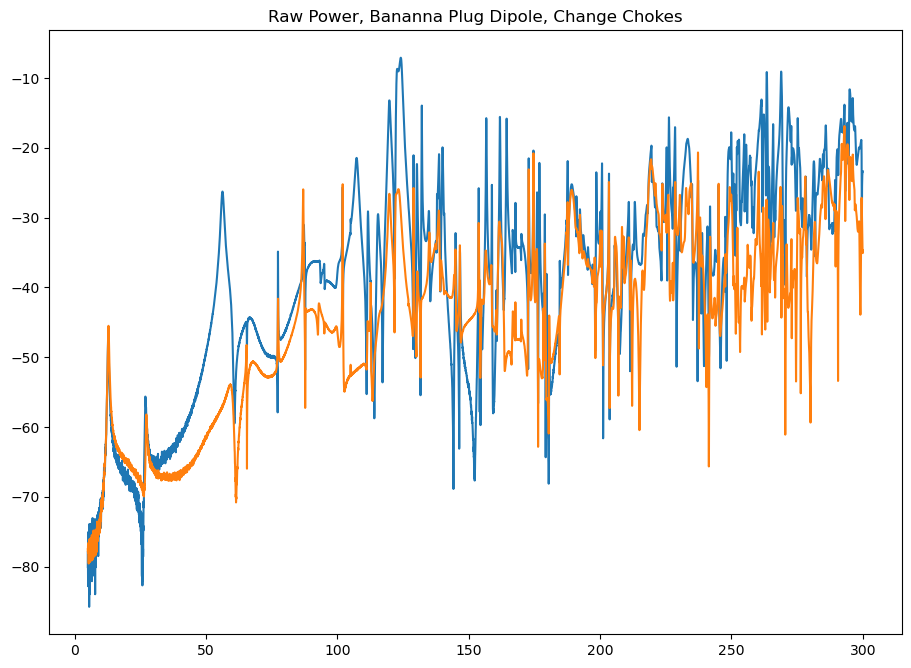

In [34]:
%matplotlib inline
plt.figure(figsize=(11, 8), dpi=100)
plt.title('Raw Power, Bananna Plug Dipole, Change Chokes')
plt.plot(freqArr, df_30cmDipBananna_noChokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['Raw Antenna Power (dBm)'],\
         label = 'No Chokes')
plt.plot(freqArr, df_30cmDipBananna_5Chokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['Raw Antenna Power (dBm)'],\
         label = '5 Chokes')


plt.plot(comsolFreq, comsolPower, label = 'Comsol')


plt.ylabel('Power (dBm)')
plt.xlabel('Frequency (MHz)')
plt.legend()

pandas.core.frame.DataFrame

In [12]:
%matplotlib inline

comsolInterp = interp1d(comsolFreq,comsolPower)(freqArr[1000:])
df_comsolInterp = pd.Series(comsolInterp)


plt.plot(freqArr[1000:], df_comsolInterp.pct_change())
plt.plot(freqArr, df_30cmDipBananna_5Chokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['Normilized Antenna Power (dBm)'].pct_change())


NameError: name 'comsolFreq' is not defined

NameError: name 'comsolFreq' is not defined

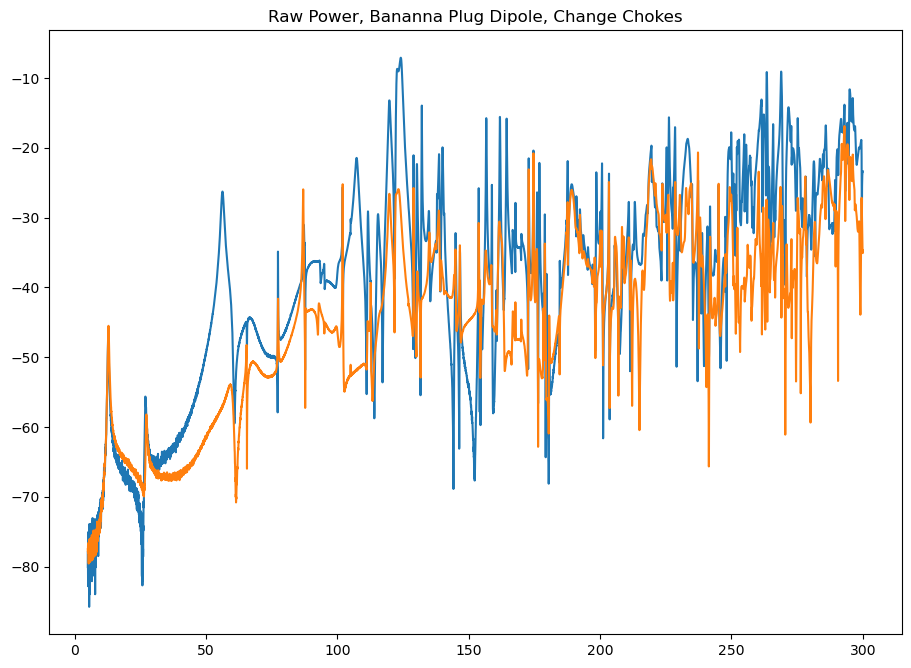

In [21]:
%matplotlib inline

plt.figure(figsize=(11, 8), dpi=100)
plt.title('Raw Power, Bananna Plug Dipole, Change Chokes')
plt.plot(freqArr, df_30cmDipBananna_noChokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['Raw Antenna Power (dBm)'],\
         label = 'No Chokes')
plt.plot(freqArr, df_30cmDipBananna_5Chokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['Raw Antenna Power (dBm)'],\
         label = '5 Chokes')


plt.plot(comsolFreq, comsolPower, label = 'Comsol')


plt.ylabel('Power (dBm)')
plt.xlabel('Frequency (MHz)')
plt.legend()

In [20]:
comsolInterp = interp1d(comsolFreq,comsolPower)(freqArr[1000:])
df_30cmDipClip_2chokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['Normilized Antenna Power (dBm)'][1000:]

plt.scatter(10**comsolInterp, 10**df_30cmDipClip_2chokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['Normilized Antenna Power (dBm)'][1000:])

NameError: name 'comsolFreq' is not defined

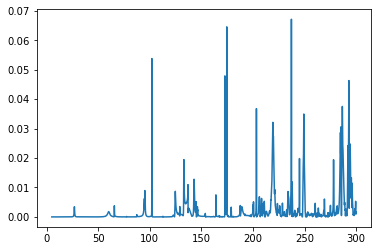

In [18]:
%matplotlib inline
plt.plot(freqArr, 10**(df_30cmDipClip_2chokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['Normilized Antenna Power (dBm)']/10))

In [227]:
%matplotlib qt
plt.plot(freqArr, 10**(df_30cmDipClip_2chokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['Normilized Antenna Power (dBm)']/10))
plt.plot(comsolFreq, 10**(comsolPower/10))

In [223]:
%matplotlib qt
plt.scatter(10**(df_30cmDipClip_2chokes_60N60E57V_20dBatt_rbw10k_DANLn100pm3dB_avg4['Normilized Antenna Power (dBm)']/10)[1000:], \
           10**(comsolInterp/10))